<a href="https://colab.research.google.com/github/bpizarrogalleguillos/IAmetodologia2025/blob/main/Taller_Supervisado_1_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos supervisados


## Objetivo
Entregar una comprensi√≥n b√°sica de los modelos supervisados en machine learning y c√≥mo se aplican en contextos cl√≠nicos, especialmente en radiolog√≠a, utilizando ejemplos guiados en Google Colab autoejecutable sin necesidad de conocimientos avanzados de programaci√≥n.

# Aprendizaje esperado

1. Conocer los tipos de problema donde los modelos supervisados pueden ser aplicados
2. Entender el concepto de variables y como se integran al flujo de trabajo en un proyecto de ML supervisado
3. Identificar modelos de ML supervisados y c√≥mo se eval√∫a su rendimiento

## Temario

## Tipos de problemas supervisados
* Regresi√≥n
* Predicci√≥n - Clasificaci√≥n

## Variables
* Features
* Labels

## Flujo de trabajo en un proyecto
* Recolecci√≥n de datos
* Pre procesamiento
* Divisi√≥n del dataset
* Entrenamiento
* Evaluaci√≥n

## Modelos
* Regresi√≥n Lineal
* Regresi√≥n Log√≠stica
* SVM
* Random Forest
* Perceptr√≥n y Red Neuronal

## M√©tricas de desempe√±o
* Accuracy
* Sensitivity
* Recall
* Curvas AUC/ROC

# Ejemplo en radiolog√≠a
* Neumon√≠a


# Glosario t√©rminos claves

- **Modelo supervisado:** Algoritmo que aprende a partir de datos etiquetados (donde se conoce el resultado).
- **Regresi√≥n:** Predice un valor num√©rico continuo (ej. nivel de PCR).
- **Clasificaci√≥n:** Predice una categor√≠a (ej. tiene o no tiene neumon√≠a).
- **Features (X):** Variables de entrada o caracter√≠sticas del paciente (edad, fiebre, PCR, etc.).
- **Label (y):** Variable objetivo que queremos predecir (ej. diagn√≥stico de neumon√≠a).
- **Overfitting:** El modelo memoriza demasiado los datos de entrenamiento y no generaliza bien.
- **Underfitting:** El modelo no aprende patrones √∫tiles; tiene bajo rendimiento en todos los datos.
- **Train/Test Split:** Dividir los datos para que el modelo se entrene en unos y se eval√∫e en otros.
- **Validation Set:** Subconjunto de entrenamiento usado para ajustar hiperpar√°metros.
- **ROC Curve:** Muestra el balance entre sensibilidad y especificidad.
- **AUC (√Årea bajo la curva):** Mide la capacidad de discriminaci√≥n del modelo; m√°s alto es mejor.
- **Precision:** De todos los positivos predichos, cu√°ntos eran realmente positivos.
- **Recall (Sensibilidad):** De todos los positivos reales, cu√°ntos fueron correctamente identificados.

# Tipos de problemas supervisados

# Ejemplo en Radiolog√≠a


Primero debemos instalar las liber√≠as que usaremos. Podemos pensar las librer√≠as como peque√±os "programas" que ya fueron programados y que contienen funciones que podemos usar para diferentes tareas espec√≠ficas.

In [1]:
# Cuaderno de Google Colab: Introducci√≥n a Machine Learning Supervisado en Radiolog√≠a

#@title üîç Introducci√≥n
"""
Este cuaderno interactivo tiene como objetivo ense√±ar los conceptos b√°sicos de Machine Learning supervisado
aplicados a un caso cl√≠nico simplificado de radiolog√≠a.

üë©‚Äç‚öïÔ∏è Caso: Predicci√≥n de neumon√≠a en base a datos cl√≠nicos y hallazgos imagenol√≥gicos.
"""

#@title üì¶ Instalaci√≥n de librer√≠as necesarias (solo si da error en tu entorno)
# Si est√°s en Google Colab, normalmente ya est√°n instaladas.
!pip install -q pandas scikit-learn matplotlib seaborn

#@title üìÅ Importar librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [85]:
# Interactive a
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
# Gradio
!pip install gradio
import gradio as gr

In [2]:
# Tutorial Interactivo de Regresi√≥n Lineal para Residentes de Radiolog√≠a

# En este ejemplo, aprender√°s a:
#   - Generar datos de ejemplo de forma interactiva.
#   - Ajustar un modelo de regresi√≥n lineal.
#   - Visualizar la l√≠nea de regresi√≥n junto con los datos.
#   - Interpretar los resultados: pendiente, intercepto y coeficiente de determinaci√≥n (R¬≤).
#
# Nota: En este ejemplo, suponemos que 'x' podr√≠a representar, por ejemplo, la dosis de radiaci√≥n, y 'y'
#       alguna medida extra√≠da de una imagen radiol√≥gica. La idea es facilitar la interpretaci√≥n pr√°ctica
#       de los resultados sin profundizar excesivamente en la matem√°tica subyacente.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipywidgets as widgets
from ipywidgets import interact
import statsmodels.api as sm

def regression_demo(slope=1.0, intercept=0.0, noise=1.0, n_points=50):
    # Fijamos una semilla para obtener resultados reproducibles
    np.random.seed(42)

    # Generaci√≥n de los datos:
    # Creamos una variable independiente 'x' de forma equidistante, que se puede interpretar como,
    # por ejemplo, la dosis de radiaci√≥n.
    x = np.linspace(0, 10, n_points)
    # Creamos la variable dependiente 'y' aplicando una relaci√≥n lineal (slope*x + intercept)
    # a la que se le a√±ade un t√©rmino aleatorio que simula la variabilidad en los datos (ruido).
    y = slope * x + intercept + np.random.normal(0, noise, n_points)

    # Preparamos los datos para el modelo de regresi√≥n (scikit-learn requiere un formato 2D para X)
    X = x.reshape(-1, 1)

    # Ajustamos el modelo de regresi√≥n lineal utilizando scikit-learn
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculamos el coeficiente de determinaci√≥n R¬≤, que nos indica qu√© tan bien el modelo explica la variabilidad
    r2 = r2_score(y, y_pred)

    # Tambi√©n ajustamos el modelo usando statsmodels para obtener un resumen estad√≠stico completo
    X_sm = sm.add_constant(x)
    model_sm = sm.OLS(y, X_sm).fit()

    # Visualizamos los datos y la l√≠nea de regresi√≥n
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos observados')
    plt.plot(x, y_pred, color='red', label='L√≠nea de regresi√≥n')
    plt.xlabel('Variable Independiente (Ej: Dosis de radiaci√≥n)')
    plt.ylabel('Variable Dependiente (Ej: Medida de imagen)')
    plt.title('Demostraci√≥n Interactiva de Regresi√≥n Lineal')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostramos los par√°metros obtenidos del modelo con scikit-learn
    print("Par√°metros del modelo:")
    print(f"   Pendiente (coeficiente): {model.coef_[0]:.3f}")
    print(f"   Intercepto: {model.intercept_:.3f}")
    print(f"   Coeficiente de determinaci√≥n (R¬≤): {r2:.3f}")

    # Presentamos el resumen detallado obtenido con statsmodels
    print("\nResumen del modelo (statsmodels):")
    print(model_sm.summary())

    # Explicaci√≥n e interpretaci√≥n de los resultados:
    print("\nInterpretaci√≥n de los resultados:")
    print("   - La pendiente indica el cambio esperado en la variable dependiente por cada unidad de incremento en la variable independiente.")
    print("     Por ejemplo, si la pendiente es 2, se espera que la medida de imagen aumente 2 unidades por cada incremento en la dosis de radiaci√≥n.")
    print("   - El intercepto es el valor estimado de la variable dependiente cuando la variable independiente es cero.")
    print("   - El coeficiente de determinaci√≥n (R¬≤) indica qu√© proporci√≥n de la variabilidad en los datos se explica por el modelo.")
    print("     Un valor de R¬≤ cercano a 1 sugiere un ajuste excelente, mientras que uno cercano a 0 indica un ajuste pobre.")
    print("   - En el resumen de statsmodels se puede observar tambi√©n el valor 'P>|t|' para cada coeficiente,")
    print("     que indica si la relaci√≥n encontrada es estad√≠sticamente significativa.")

# Creamos la interfaz interactiva para que el usuario pueda modificar los par√°metros y observar los cambios en tiempo real.
interact(regression_demo,
         slope=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='Pendiente:'),
         intercept=widgets.FloatSlider(min=-10.0, max=10.0, step=0.1, value=0.0, description='Intercepto:'),
         noise=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Ruido:'),
         n_points=widgets.IntSlider(min=20, max=200, step=10, value=50, description='N√∫mero de puntos:')
        )

interactive(children=(FloatSlider(value=1.0, description='Pendiente:', max=5.0, min=-5.0), FloatSlider(value=0‚Ä¶

<function __main__.regression_demo(slope=1.0, intercept=0.0, noise=1.0, n_points=50)>

In [22]:
# Demostraci√≥n Interactiva de Regresi√≥n Lineal con Datos Simulados - Gradio

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import gradio as gr

# -----------------------------------------------------------
# 1. Funci√≥n de regresi√≥n interactiva con datos simulados
# -----------------------------------------------------------
def regression_demo_gradio(slope=1.0, intercept=0.0, noise=1.0, n_points=50):
    np.random.seed(42)
    x = np.linspace(0, 10, n_points)
    y = slope * x + intercept + np.random.normal(0, noise, n_points)
    X = x.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    X_sm = sm.add_constant(x)
    model_sm = sm.OLS(y, X_sm).fit()

    # Gr√°fico de regresi√≥n
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(x, y, color='blue', label='Datos observados')
    ax.plot(x, y_pred, color='red', label='L√≠nea de regresi√≥n')
    ax.set_xlabel('Variable Independiente (Ej: Dosis de radiaci√≥n)')
    ax.set_ylabel('Variable Dependiente (Ej: Medida de imagen)')
    ax.set_title('Gr√°fico de Regresi√≥n')
    ax.grid(True)
    ax.legend()
    plt.tight_layout()

    # Resumen del modelo
    resumen = f"Pendiente: {model.coef_[0]:.3f}\n"
    resumen += f"Intercepto: {model.intercept_:.3f}\n"
    resumen += f"Coeficiente de determinaci√≥n (R¬≤): {r2:.3f}\n\n"
    resumen += "Resumen completo del modelo (statsmodels):\n"
    resumen += str(model_sm.summary())

    # Interpretaci√≥n automatizada
    interpretacion = ("\nInterpretaci√≥n:\n"
        "- La pendiente indica el cambio esperado en la variable dependiente por unidad de incremento en la independiente.\n"
        "- El intercepto es el valor estimado cuando la variable independiente es 0.\n"
        "- El coeficiente R¬≤ indica qu√© proporci√≥n de la variabilidad es explicada por el modelo.\n")
    if r2 >= 0.7:
        interpretacion += "  ‚Üí El modelo presenta un ajuste fuerte.\n"
    elif r2 >= 0.4:
        interpretacion += "  ‚Üí Ajuste moderado, pueden influir otras variables.\n"
    else:
        interpretacion += "  ‚Üí Pobre ajuste, el modelo explica poco la variabilidad.\n"

    return fig, resumen, interpretacion

# -----------------------------------------------------------
# 2. Interfaz de usuario Gradio
# -----------------------------------------------------------
iface = gr.Interface(
    fn=regression_demo_gradio,
    inputs=[
        gr.Slider(minimum=-5.0, maximum=5.0, step=0.1, value=1.0, label="Pendiente (slope)"),
        gr.Slider(minimum=-10.0, maximum=10.0, step=0.1, value=0.0, label="Intercepto"),
        gr.Slider(minimum=0.1, maximum=5.0, step=0.1, value=1.0, label="Nivel de ruido"),
        gr.Slider(minimum=20, maximum=200, step=10, value=50, label="N√∫mero de puntos")
    ],
    outputs=[
        gr.Plot(label="Gr√°fico de regresi√≥n"),
        gr.Textbox(label="Resumen del modelo", lines=30),
        gr.Textbox(label="Interpretaci√≥n", lines=10)
    ],
    title="Regresi√≥n Lineal Interactiva con Datos Simulados",
    description="Ajusta los par√°metros para visualizar c√≥mo cambian los resultados de una regresi√≥n lineal sobre datos sint√©ticos."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a68004145c5b92a38e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# üìã Flujo completo de ML en Radiolog√≠a: Diagn√≥stico de Neumon√≠a
"""
üöÄ Flujo de trabajo cl√°sico en Machine Learning:

1. Recolecci√≥n de datos ‚Üí Dataset cl√≠nico simulado.
2. Preprocesamiento     ‚Üí Codificaci√≥n de variables categ√≥ricas, limpieza.
3. Divisi√≥n del dataset  ‚Üí Train/Test split.
4. Entrenamiento         ‚Üí Modelos supervisados.
5. Evaluaci√≥n            ‚Üí M√©tricas: accuracy, recall, curva ROC.
"""

In [73]:
!wget https://raw.githubusercontent.com/bpizarrogalleguillos/IAmetodologia2025/main/data_2.csv

--2025-05-06 01:40:19--  https://raw.githubusercontent.com/bpizarrogalleguillos/IAmetodologia2025/main/data_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17303 (17K) [text/plain]
Saving to: ‚Äòdata_2.csv‚Äô

data_2.csv          100%[===================>]  16.90K  --.-KB/s    in 0.003s  

2025-05-06 01:40:20 (5.16 MB/s) - ‚Äòdata_2.csv‚Äô saved [17303/17303]



In [74]:
pd.read_csv("data_2.csv")

edad sexo  fiebre  temperatura  tos  infiltrado_rx  \
0      58    F       1         39.0    1              0   
1      48    F       1         38.4    0              1   
2      39    F       1         38.6    1              0   
3      21    M       1         38.3    1              0   
4      30    M       0         37.1    1              0   
..    ...  ...     ...          ...  ...            ...   
295    47    F       1         38.8    0              1   
296    35    F       1         38.4    1              0   
297    86    M       0         36.6    1              1   
298    56    M       1         38.1    0              1   
299    77    M       0         37.0    1              0   

     engrosamiento_parietal  foco_condensacion  patron_intersticial  \
0                         0                  1                    0   
1                         0                  0                    0   
2                         0                  1                    1   
3                         1                  0                    0   
4                         0                  1                    0   
..                      ...                ...                  ...   
295                       0                  1                    0   
296                       0                  0                    0   
297                       0                  0                    1   
298                       0                  0                    1   
299                       1                  0                    0   

     derrame_pleural  broncograma_aereo  cruza_cisuras  leucocitosis   pcr  \
0                  1                  0              0         12568  44.8   
1                  0                  0              0         11522  37.0   
2                  0                  0              0         15715  48.2   
3                  0                  0              0         13450  47.1   
4                  0                  0              0          6462  18.6   
..               ...                ...            ...           ...   ...   
295                0                  0              0         12572  42.5   
296                0                  0              0         12889  43.7   
297                0                  0              0          8143  24.9   
298                0                  1              0         13457  40.2   
299                0                  1              0          7007  19.4   

     indice_rx  diagnostico_neumonia  ingreso_uci  intubacion  mortalidad  
0      10.7536                     1            1           1           1  
1       7.1544                     1            0           0           0  
2      10.5530                     1            1           1           1  
3       7.5450                     1            1           1           0  
4       5.2224                     1            1           1           0  
..         ...                   ...          ...         ...         ...  
295    10.6394                     1            1           1           0  
296     6.2628                     1            1           1           1  
297     4.8736                     0            0           0           0  
298    10.2014                     1            0           1           0  
299     5.3714                     0            0           0           0  

[300 rows x 19 columns]

In [75]:
#data = pd.read_csv('data_supervisado_1.csv')
#data = pd.read_csv("Datos_cl_nicos_simulados.csv")
#data = pd.read_csv("dataset_clinico_simulado.csv")
data = pd.read_csv("data_2.csv")

# An√°lisis exploratorio

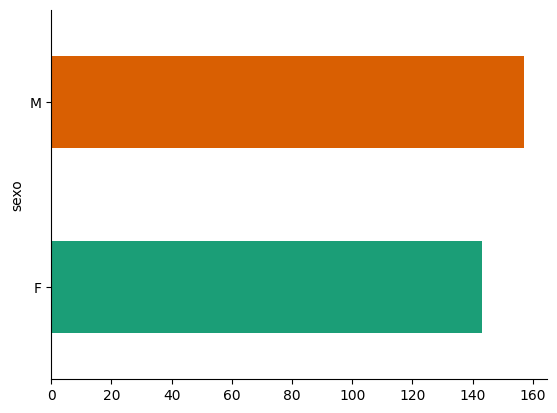

In [76]:
# @title sexo

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

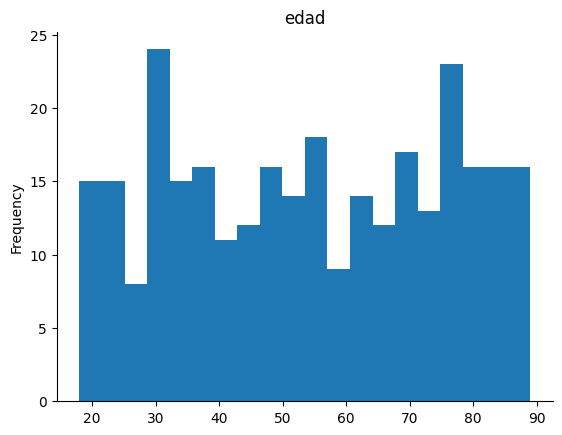

In [77]:
# @title edad

from matplotlib import pyplot as plt
data['edad'].plot(kind='hist', bins=20, title='edad')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

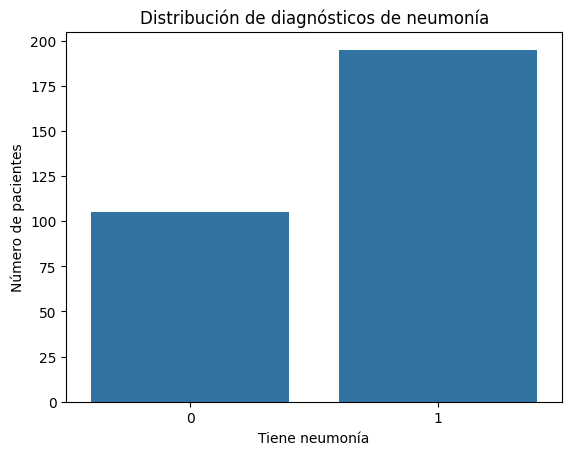

In [78]:
#@title üìà Visualizaci√≥n b√°sica del dataset
sns.countplot(x='diagnostico_neumonia', data=data)
plt.title("Distribuci√≥n de diagn√≥sticos de neumon√≠a")
plt.xlabel("Tiene neumon√≠a")
plt.ylabel("N√∫mero de pacientes")
plt.show()

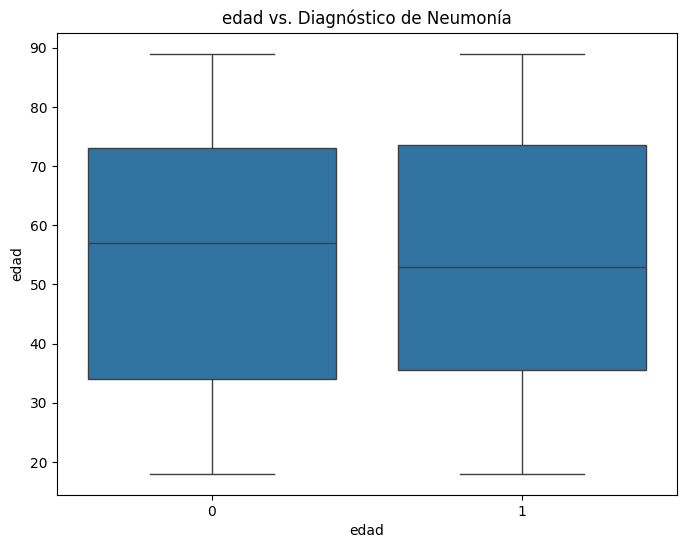

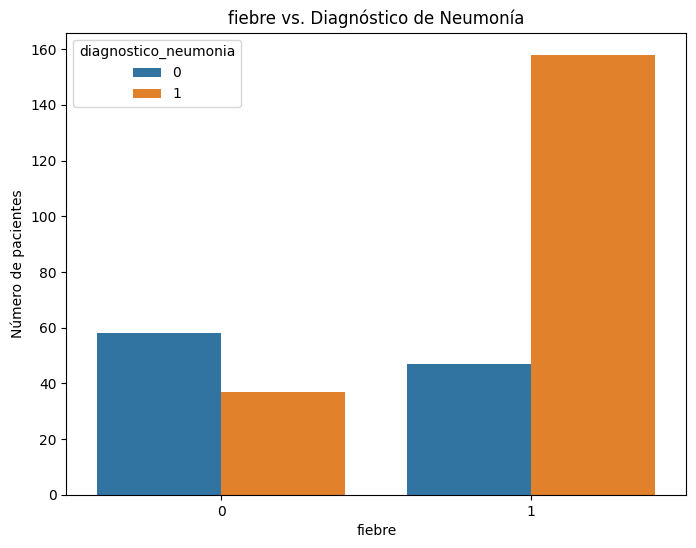

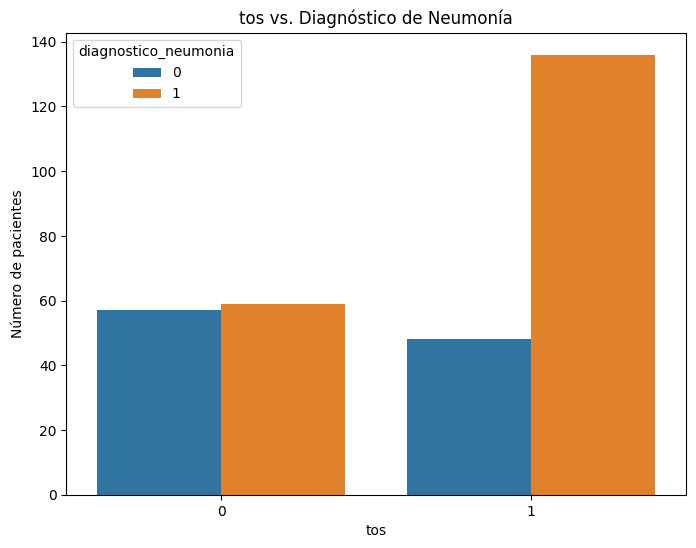

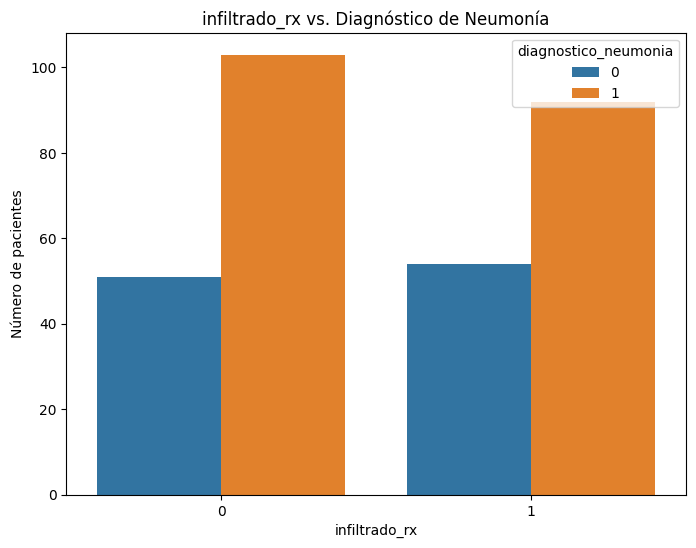

In [79]:
# Lista de variables a comparar con el diagn√≥stico de neumon√≠a
features_to_plot = ['edad', 'fiebre', 'tos', 'infiltrado_rx']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))

    if data[feature].nunique() <= 2:  # Variables binarias o categ√≥ricas simples
        sns.countplot(x=feature, hue='diagnostico_neumonia', data=data)
        plt.ylabel('N√∫mero de pacientes')
    else:  # Variables continuas (como edad)
        sns.boxplot(x='diagnostico_neumonia', y=feature, data=data)
        plt.ylabel(feature)

    plt.title(f'{feature} vs. Diagn√≥stico de Neumon√≠a')
    plt.xlabel(feature)
    plt.show()

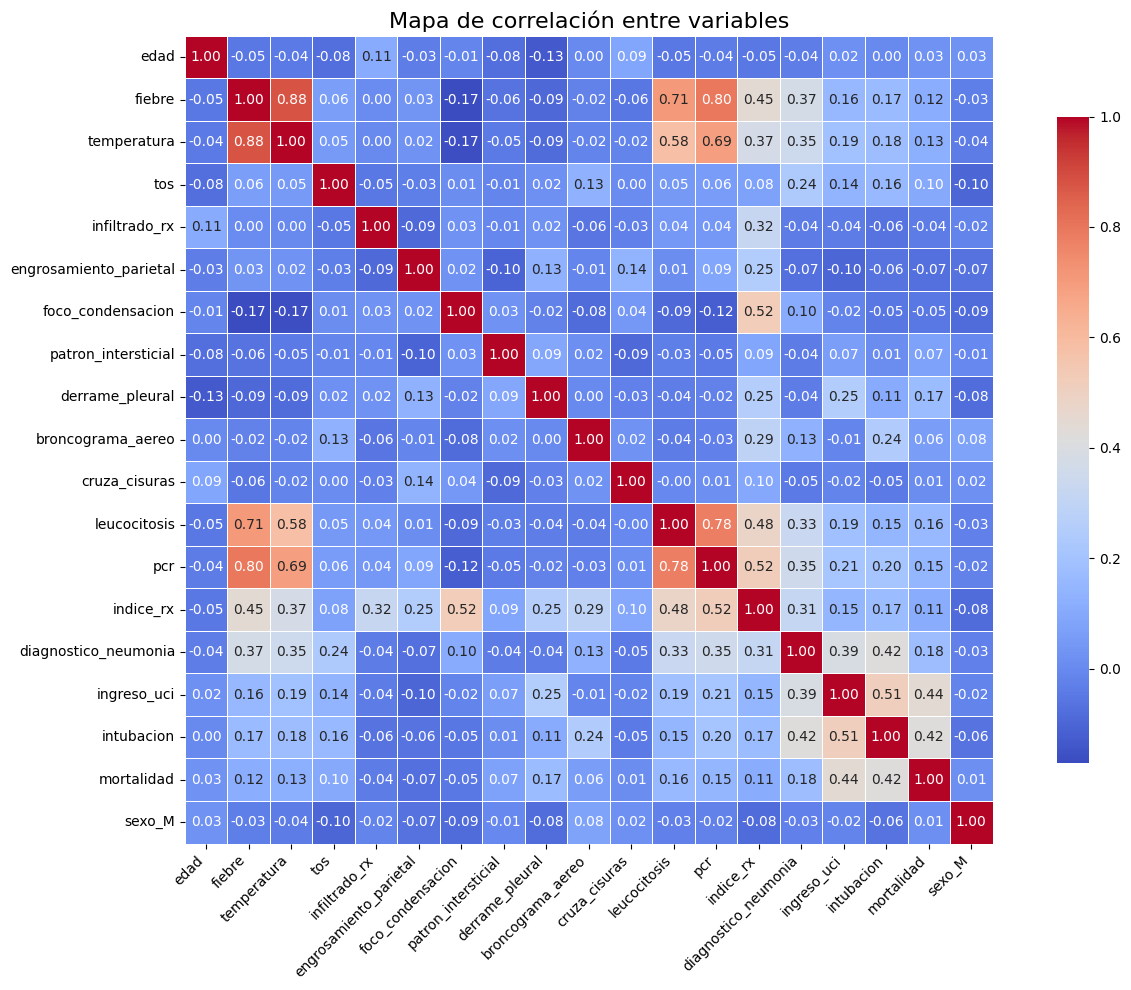

In [80]:
#@title üìä Mapa de correlaci√≥n entre variables

# Asegurar que todas las variables categ√≥ricas est√©n codificadas num√©ricamente
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Calcular matriz de correlaci√≥n
correlation_matrix = encoded_data.corr()

# Graficar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Mapa de correlaci√≥n entre variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
#@title üîÑ Preprocesamiento de datos

# Convertir variable categ√≥rica 'sexo' a variable num√©rica
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Eliminar variables que no deben ser usadas como predictoras del diagn√≥stico
variables_a_excluir = ['ingreso_uci', 'intubacion', 'mortalidad']
X = encoded_data.drop(columns=['diagnostico_neumonia'] + variables_a_excluir)

# Variable objetivo
y = encoded_data['diagnostico_neumonia']

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ejemplo de regresi√≥n linea

Ya hemos realizado un an√°lisis exploratorio de los datos. Ahora queremos modelar y poder cuantificar la relaci√≥n entre ellos. Para esto contamos con una herramienta simple pero de gran utilidad denominada regresi√≥n lineal.

En base a lo expuesto en la clase ¬øQue variables podr√≠an ser utilizadas para una regresi√≥n lineal en este set de datos?

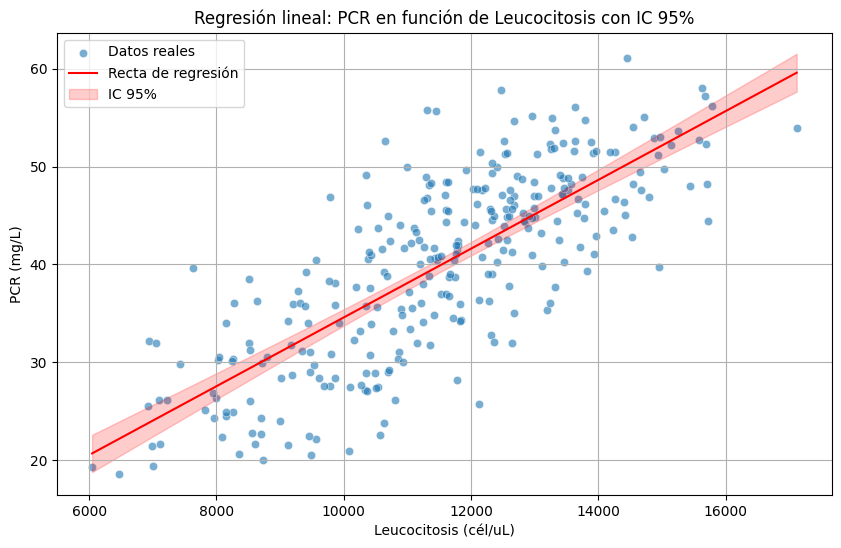

In [83]:
#@title üìà Regresi√≥n lineal con intervalo de confianza del 95%
import statsmodels.api as sm

# Variable independiente y dependiente
X_lin = data[['leucocitosis']]
y_lin = data['pcr']

# Agregar constante para statsmodels
X_lin_const = sm.add_constant(X_lin)

# Ajustar modelo con statsmodels para obtener IC
modelo_lin = sm.OLS(y_lin, X_lin_const).fit()

# Generar valores para predecir y graficar
x_pred = np.linspace(X_lin['leucocitosis'].min(), X_lin['leucocitosis'].max(), 300)
x_pred_df = pd.DataFrame({'leucocitosis': x_pred})
x_pred_const = sm.add_constant(x_pred_df)

# Predicciones con IC
preds = modelo_lin.get_prediction(x_pred_const)
pred_summary = preds.summary_frame(alpha=0.05)  # 95% CI

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='leucocitosis', y='pcr', data=data, label='Datos reales', alpha=0.6)
plt.plot(x_pred, pred_summary['mean'], color='red', label='Recta de regresi√≥n')
plt.fill_between(x_pred, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='red', alpha=0.2, label='IC 95%')
plt.xlabel('Leucocitosis (c√©l/uL)')
plt.ylabel('PCR (mg/L)')
plt.title('Regresi√≥n lineal: PCR en funci√≥n de Leucocitosis con IC 95%')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# Tutorial Interactivo de Regresi√≥n Lineal para Residentes de Radiolog√≠a usando un Dataset Real

# En este tutorial se:
#   - Carga un dataset real con variables cl√≠nicas y radiol√≥gicas.
#   - Permite seleccionar de forma interactiva la variable independiente y la dependiente.
#   - Ajusta un modelo de regresi√≥n lineal y muestra la gr√°fica junto con el modelo.
#   - Explica c√≥mo interpretar la pendiente, el intercepto y el coeficiente de determinaci√≥n (R¬≤).
#
# Ejemplo de variables en el dataset:
#   - edad, fiebre, tos, infiltrado_rx, engrosamiento_parietal, foco_condensacion,
#     patron_intersticial, derrame_pleural, broncograma_aereo, cruza_cisuras,
#     leucocitosis, pcr, sexo_M
# Puedes pensar en alguna variable (por ejemplo, "edad") como predictor y en otra (por ejemplo, "pcr")
# como medida de respuesta relacionada con an√°lisis radiol√≥gicos.



# -----------------------------------------------------------
# 1. Cargar el Dataset
# -----------------------------------------------------------
# Se asume que el archivo 'data_supervisado_1.csv' est√° en el entorno de Colab.
# Si el dataset est√° delimitado por tabulaciones, se utiliza sep='\t'
df= data

# Convertir la variable 'sexo_M' de booleana a num√©rica (0 o 1) para su posible inclusi√≥n en la regresi√≥n.
#if df['sexo_M'].dtype == 'bool':
#    df['sexo_M'] = df['sexo_M'].astype(int)

# Identificar las columnas num√©ricas disponibles para el an√°lisis.
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas num√©ricas disponibles para an√°lisis:", numeric_columns)



Columnas num√©ricas disponibles para an√°lisis: ['edad', 'fiebre', 'temperatura', 'tos', 'infiltrado_rx', 'engrosamiento_parietal', 'foco_condensacion', 'patron_intersticial', 'derrame_pleural', 'broncograma_aereo', 'cruza_cisuras', 'leucocitosis', 'pcr', 'indice_rx', 'diagnostico_neumonia', 'ingreso_uci', 'intubacion', 'mortalidad']


In [89]:
# -----------------------------------------------------------
# 2. Definir la Funci√≥n Interactiva para la Regresi√≥n
# -----------------------------------------------------------
def regression_interactive(x_column, y_column):
    """
    Esta funci√≥n:
      - Extrae la variable independiente (x) y la variable dependiente (y) seg√∫n la selecci√≥n.
      - Ajusta un modelo de regresi√≥n lineal usando scikit-learn.
      - Calcula el coeficiente de determinaci√≥n (R¬≤).
      - Obtiene un resumen estad√≠stico completo del modelo con statsmodels.
      - Grafica los datos observados junto a la l√≠nea de regresi√≥n.
      - Proporciona una interpretaci√≥n de los resultados.
    """
    # Extraer los datos de las columnas seleccionadas
    X = df[[x_column]].values
    y = df[y_column].values

    # Ajustar el modelo de regresi√≥n lineal (scikit-learn)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Ajuste con statsmodels para obtener un resumen detallado
    X_sm = sm.add_constant(X)  # Agrega constante (intercepto)
    model_sm = sm.OLS(y, X_sm).fit()

    # Graficar los datos y la l√≠nea ajustada
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Datos observados')
    plt.plot(X, y_pred, color='red', label='L√≠nea de regresi√≥n')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Regresi√≥n Lineal: {y_column} vs. {x_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostrar par√°metros obtenidos con scikit-learn
    print("Par√°metros del modelo (scikit-learn):")
    print(f"   Pendiente (coeficiente): {model.coef_[0]:.3f}")
    print(f"   Intercepto: {model.intercept_:.3f}")
    print(f"   Coeficiente de determinaci√≥n (R¬≤): {r2:.3f}\n")

    # Mostrar resumen detallado del modelo con statsmodels
    print("Resumen detallado del modelo (statsmodels):")
    print(model_sm.summary())

    # Interpretaci√≥n de los resultados:
    print("\nInterpretaci√≥n de los resultados:")
    print(f"   - La pendiente de {model.coef_[0]:.3f} indica el cambio esperado en '{y_column}' por cada unidad adicional en '{x_column}'.")
    print("     Por ejemplo, si '{x_column}' representa la 'edad', una pendiente de 0.5 implicar√≠a que por cada a√±o adicional se espera un aumento de 0.5 unidades en '{y_column}'.")
    print("   - El intercepto es el valor de '{y_column}' cuando '{x_column}' es 0, lo cual en algunos contextos puede o no tener interpretaci√≥n cl√≠nica directa.")
    print("   - El coeficiente de determinaci√≥n (R¬≤) indica la proporci√≥n de la variabilidad observada en los datos que es explicada por el modelo.")
    if r2 >= 0.7:
        print("     Un R¬≤ alto (cercano a 1) sugiere un buen ajuste del modelo.")
    elif r2 >= 0.4:
        print("     Un R¬≤ moderado indica que el modelo explica parte de la variabilidad, pero hay otros factores involucrados.")
    else:
        print("     Un R¬≤ bajo (cercano a 0) sugiere que el modelo tiene limitaciones para explicar la variabilidad de los datos.")
    print("   - Revisa los valores de p-value en el resumen de statsmodels para entender la significancia estad√≠stica de los coeficientes.")

# -----------------------------------------------------------
# 3. Crear la Interfaz Interactiva
# -----------------------------------------------------------
# Se generan widgets para seleccionar, de entre las columnas num√©ricas, la variable independiente (x)
# y la variable dependiente (y).
interact(regression_interactive,
         x_column=widgets.Dropdown(options=numeric_columns, value=numeric_columns[0],
                                   description='Variable independiente:'),
         y_column=widgets.Dropdown(options=numeric_columns,
                                   value=numeric_columns[1] if len(numeric_columns) > 1 else numeric_columns[0],
                                   description='Variable dependiente:'))

interactive(children=(Dropdown(description='Variable independiente:', options=('edad', 'fiebre', 'temperatura'‚Ä¶

<function __main__.regression_interactive(x_column, y_column)>

In [90]:


# -----------------------------------------------------------
# 1. Cargar el Dataset
# -----------------------------------------------------------
df = data
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# -----------------------------------------------------------
# 2. Funciones de Regresi√≥n y Explicaci√≥n
# -----------------------------------------------------------
def regression_gradio(x_column, y_column):
    X = df[[x_column]].values
    y = df[y_column].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(X, y, color='blue', label='Datos observados')
    ax.plot(X, y_pred, color='red', label='L√≠nea de regresi√≥n')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title(f'{y_column} vs. {x_column}')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()

    resumen = f"Pendiente: {model.coef_[0]:.3f}\n"
    resumen += f"Intercepto: {model.intercept_:.3f}\n"
    resumen += f"Coeficiente de determinaci√≥n (R¬≤): {r2:.3f}\n"
    if r2 >= 0.7:
        resumen += "Buen ajuste del modelo.\n"
    elif r2 >= 0.4:
        resumen += "Ajuste moderado.\n"
    else:
        resumen += "Pobre ajuste.\n"
    resumen += f"\nResumen statsmodels:\n{model_sm.summary()}"

    explicacion = ""
    if r2 >= 0.7:
        explicacion += "\nEl modelo muestra un buen ajuste, lo que indica que la variable independiente tiene una relaci√≥n fuerte con la variable dependiente. Esto puede tener utilidad diagn√≥stica o pron√≥stica si el contexto cl√≠nico lo respalda."
    elif r2 >= 0.4:
        explicacion += "\nEl modelo tiene un ajuste moderado. Hay una relaci√≥n visible entre las variables, pero probablemente intervienen otros factores no considerados."
    else:
        explicacion += "\nEl modelo no explica bien la variabilidad de la variable dependiente. Es posible que la relaci√≥n no sea lineal o que la variable seleccionada no sea un buen predictor."

    explicacion += f"\n\nEn este caso, una pendiente de {model.coef_[0]:.2f} indica que por cada unidad que aumenta '{x_column}', se espera que '{y_column}' cambie en promedio esa misma cantidad."
    explicacion += f" El intercepto de {model.intercept_:.2f} representa el valor de '{y_column}' cuando '{x_column}' es cero, lo cual puede o no tener significado cl√≠nico."

    return fig, resumen, explicacion

# -----------------------------------------------------------
# 3. Interfaz Gradio
# -----------------------------------------------------------
iface = gr.Interface(
    fn=regression_gradio,
    inputs=[
        gr.Dropdown(choices=numeric_columns, label="Variable independiente"),
        gr.Dropdown(choices=numeric_columns, label="Variable dependiente")
    ],
    outputs=[
        gr.Plot(label="Gr√°fico de Regresi√≥n"),
        gr.Textbox(label="Resumen del Modelo"),
        gr.Textbox(label="Explicaci√≥n Simulada (Estilo LLM)")
    ],
    title="Regresi√≥n Lineal Interactiva para Radiolog√≠a",
    description="Selecciona las variables para visualizar la regresi√≥n lineal y obtener interpretaci√≥n automatizada."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://225721250655a3181d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Regresi√≥n Log√≠stica

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


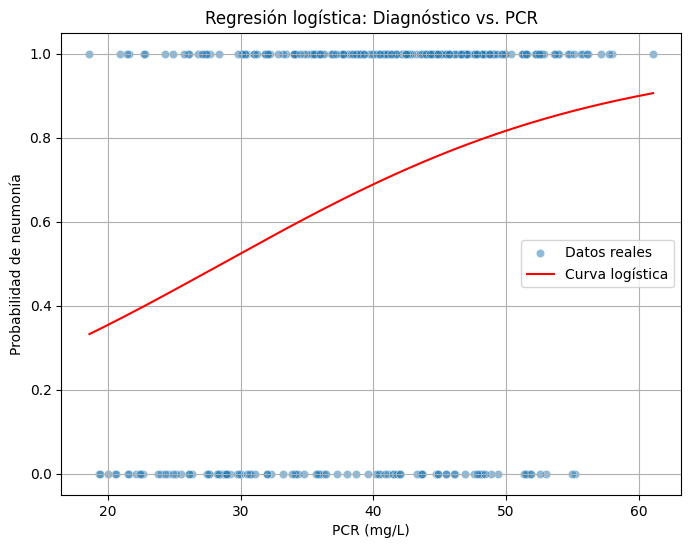

In [ ]:
#@title üìâ Ejemplo de regresi√≥n log√≠stica: Neumon√≠a vs. PCR
from sklearn.linear_model import LogisticRegression

# Variables
X_log = data[['pcr']]
y_log = data['diagnostico_neumonia']

# Modelo
modelo_log = LogisticRegression()
modelo_log.fit(X_log, y_log)

# Predicciones (probabilidad)
x_range = np.linspace(data['pcr'].min(), data['pcr'].max(), 300).reshape(-1, 1)
y_pred_prob = modelo_log.predict_proba(x_range)[:, 1]

# Gr√°fico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pcr', y='diagnostico_neumonia', data=data, label='Datos reales', alpha=0.5)
plt.plot(x_range, y_pred_prob, color='red', label='Curva log√≠stica')
plt.xlabel('PCR (mg/L)')
plt.ylabel('Probabilidad de neumon√≠a')
plt.title('Regresi√≥n log√≠stica: Diagn√≥stico vs. PCR')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title ü§ñ Entrenar modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Ejemplo de regresi√≥n linea#@title üìä Evaluaci√≥n del modelo
predicciones = modelo.predict(X_test)
print("Exactitud del modelo (accuracy):", accuracy_score(y_test, predicciones))
print("\nReporte de clasificaci√≥n:\n")
print(classification_report(y_test, predicciones))



Exactitud del modelo (accuracy): 0.6666666666666666

Reporte de clasificaci√≥n:

              precision    recall  f1-score   support

           0       0.46      0.43      0.44        28
           1       0.75      0.77      0.76        62

    accuracy                           0.67        90
   macro avg       0.61      0.60      0.60        90
weighted avg       0.66      0.67      0.66        90



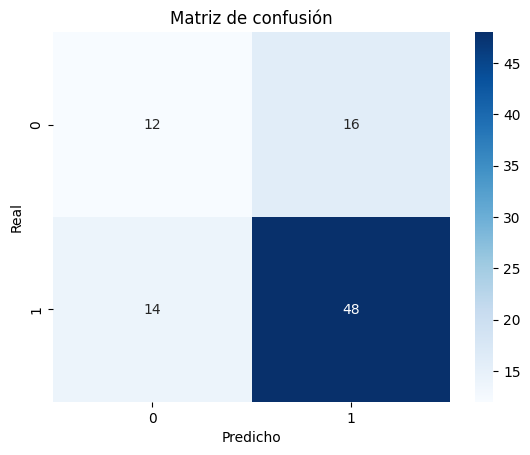

In [ ]:
# Matriz de confusi√≥n
def plot_confusion(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title('Matriz de confusi√≥n')
    plt.show()

cm = confusion_matrix(y_test, predicciones)
plot_confusion(cm)


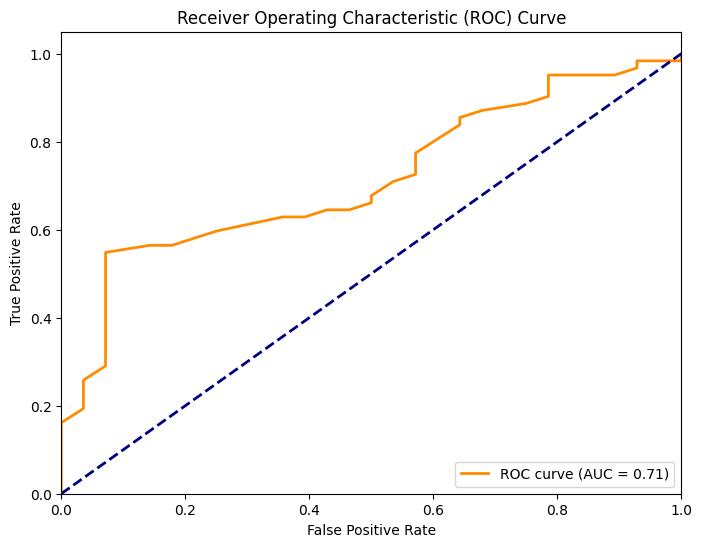

In [ ]:
# prompt: Create AUC/ROC curves for this random forest trained model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = modelo.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#@title üîç Simulador de predicci√≥n de neumon√≠a

#@markdown Ingresa las caracter√≠sticas del paciente:
edad = 56  #@param {type: "slider", min: 18, max: 100, step: 1}
sexo = "F"  #@param ["M", "F"]
fiebre = 0  #@param {type:"slider", min:0, max:1, step:1}
tos = 1  #@param {type:"slider", min:0, max:1, step:1}
infiltrado_rx = 0  #@param {type:"slider", min:0, max:1, step:1}
engrosamiento_parietal = 0  #@param {type:"slider", min:0, max:1, step:1}
foco_condensacion = 0  #@param {type:"slider", min:0, max:1, step:1}
patron_intersticial = 1  #@param {type:"slider", min:0, max:1, step:1}
derrame_pleural = 0  #@param {type:"slider", min:0, max:1, step:1}
broncograma_aereo = 1  #@param {type:"slider", min:0, max:1, step:1}
cruza_cisuras = 1  #@param {type:"slider", min:0, max:1, step:1}
leucocitosis = 12000  #@param {type:"slider", min:4000, max:20000, step:500}
pcr = 43  #@param {type:"slider", min:0, max:100, step:1}

# Crear diccionario base con todas las columnas en 0
nuevo_paciente_dict = {col: 0 for col in X.columns}

# Actualizar valores conocidos
nuevo_paciente_dict.update({
    'edad': edad,
    'sexo_M': 1 if sexo == 'M' else 0,
    'fiebre': fiebre,
    'tos': tos,
    'infiltrado_rx': infiltrado_rx,
    'engrosamiento_parietal': engrosamiento_parietal,
    'foco_condensacion': foco_condensacion,
    'patron_intersticial': patron_intersticial,
    'derrame_pleural': derrame_pleural,
    'broncograma_aereo': broncograma_aereo,
    'cruza_cisuras': cruza_cisuras,
    'leucocitosis': leucocitosis,
    'pcr': pcr
})

# Crear DataFrame asegurando el orden
nuevo_paciente = pd.DataFrame([nuevo_paciente_dict], columns=X.columns)

# Predicci√≥n
pred_nuevo = modelo.predict(nuevo_paciente)
proba = modelo.predict_proba(nuevo_paciente)[0][1]

print("¬øTiene neumon√≠a este paciente?")
print(f"Predicci√≥n: {pred_nuevo}")
print(f"Probabilidad estimada: {proba:.2%}")

¬øTiene neumon√≠a este paciente?
Predicci√≥n: [1]
Probabilidad estimada: 80.17%


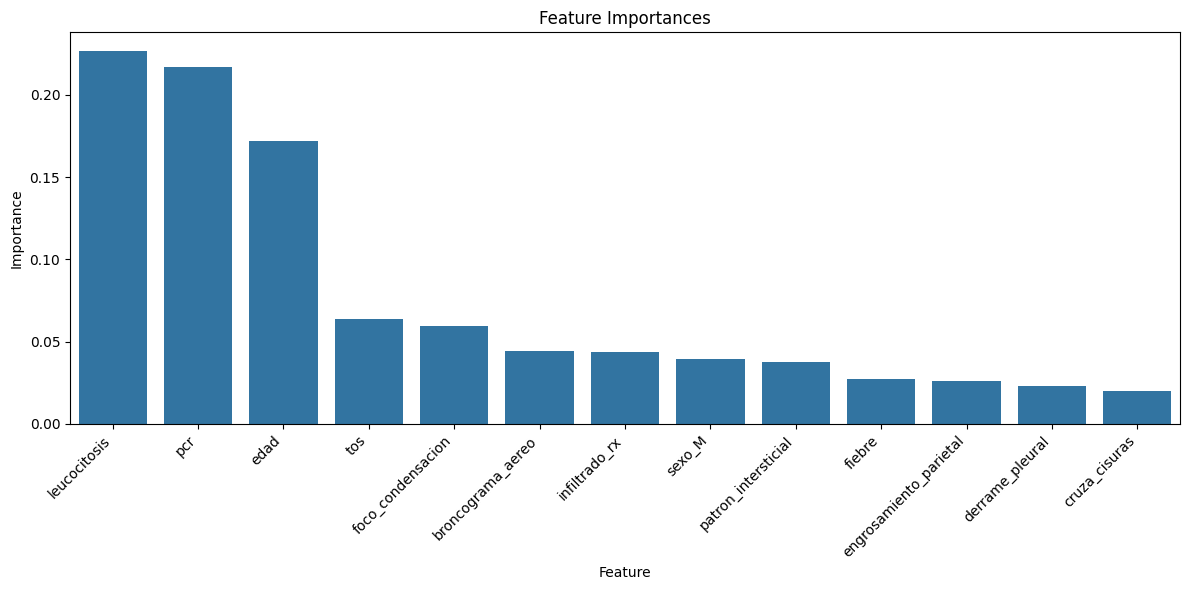

In [ ]:
#@title Explicabilidad
importances = modelo.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el dise√±o para evitar que las etiquetas se superpongan
plt.show()



üîç Modelo: Log√≠stica
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.77      0.85      0.81        62

    accuracy                           0.72        90
   macro avg       0.67      0.64      0.65        90
weighted avg       0.71      0.72      0.71        90

AUC: 0.80


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


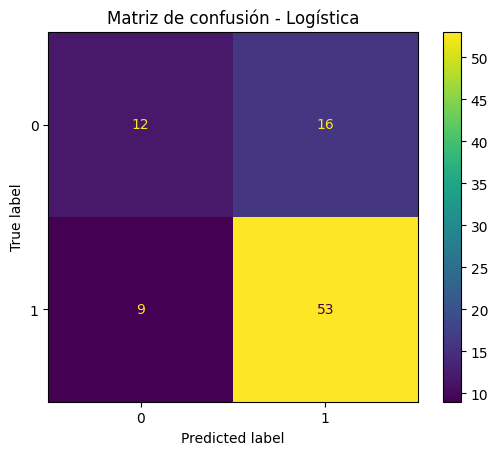


üîç Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.41      0.32      0.36        28
           1       0.72      0.79      0.75        62

    accuracy                           0.64        90
   macro avg       0.56      0.56      0.56        90
weighted avg       0.62      0.64      0.63        90

AUC: 0.67


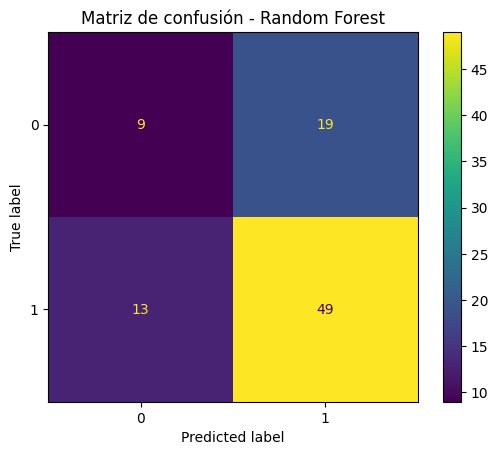


üîç Modelo: SVM
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        28
           1       0.76      0.90      0.82        62

    accuracy                           0.73        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.73      0.71        90

AUC: 0.76


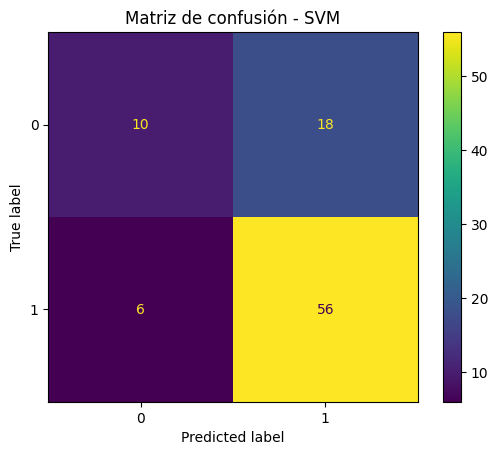


üîç Modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.69      1.00      0.82        62

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90

AUC: 0.49


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


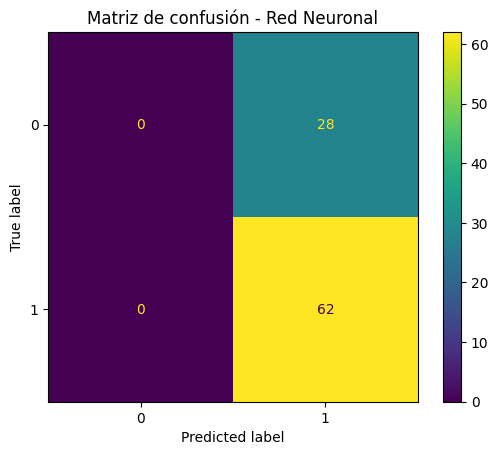

In [ ]:
#@title ü§ñ Modelos adicionales: SVM y Red Neuronal simple
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# SVM lineal
modelo_svm = SVC(kernel='linear', probability=True)
modelo_svm.fit(X_train, y_train)

# Red neuronal simple
modelo_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
modelo_nn.fit(X_train, y_train)

#@title üìä Comparaci√≥n de modelos y m√©tricas
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay

modelos = {
    'Log√≠stica': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', probability=True),
    'Red Neuronal': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    print(f"\nüîç Modelo: {nombre}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Matriz de confusi√≥n - {nombre}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. 

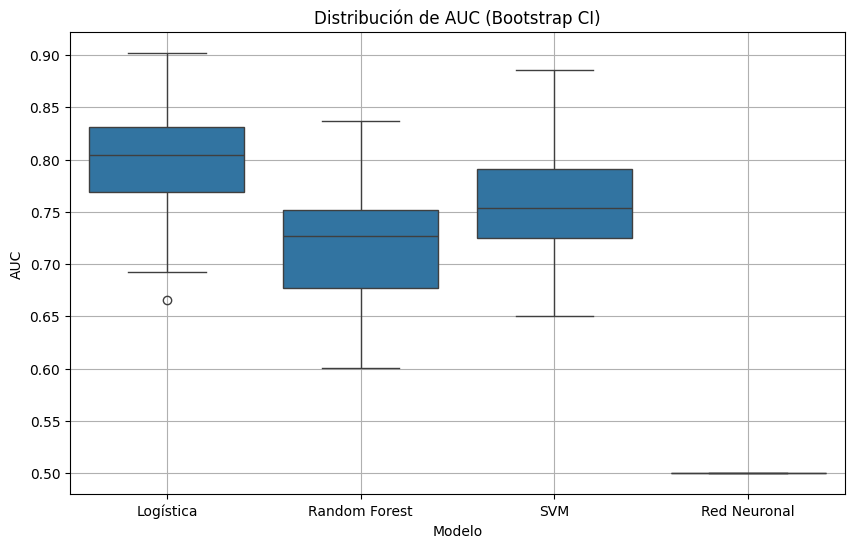

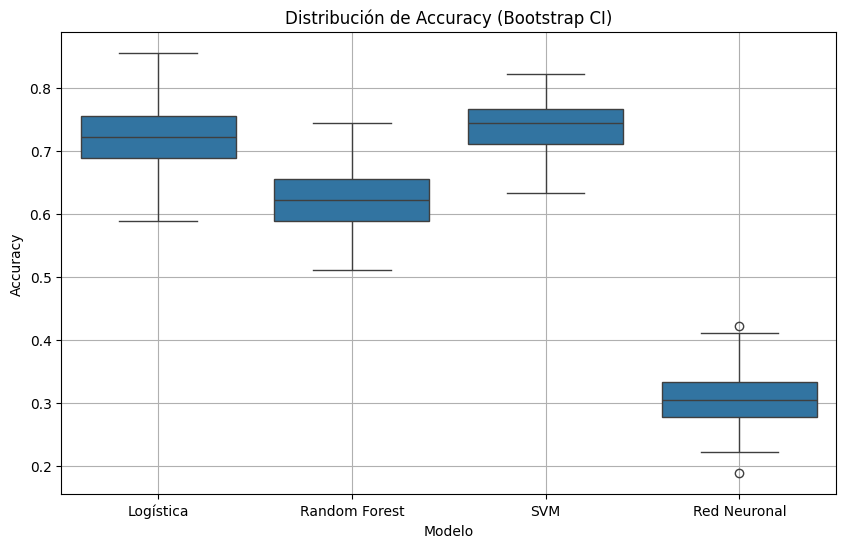

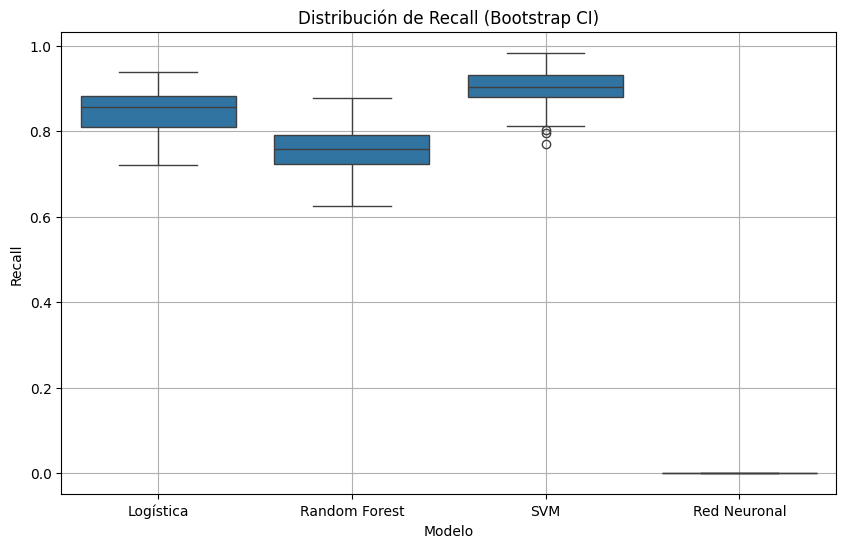

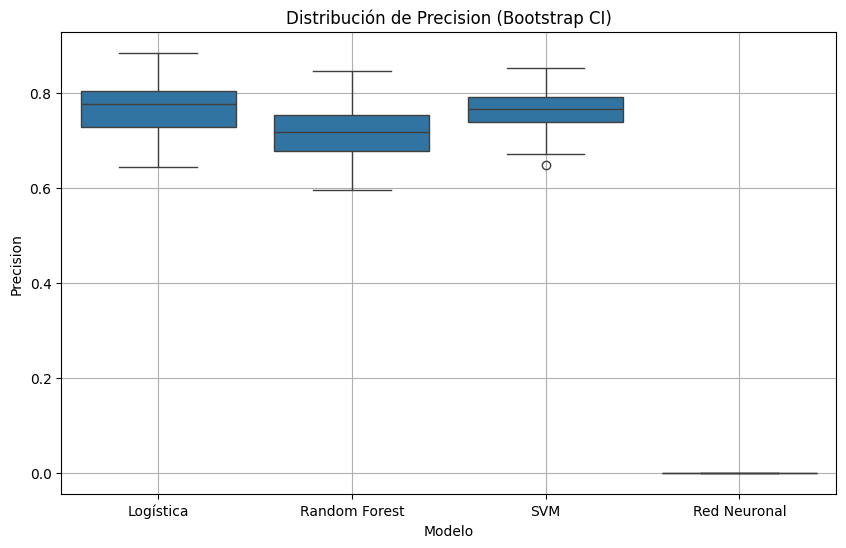

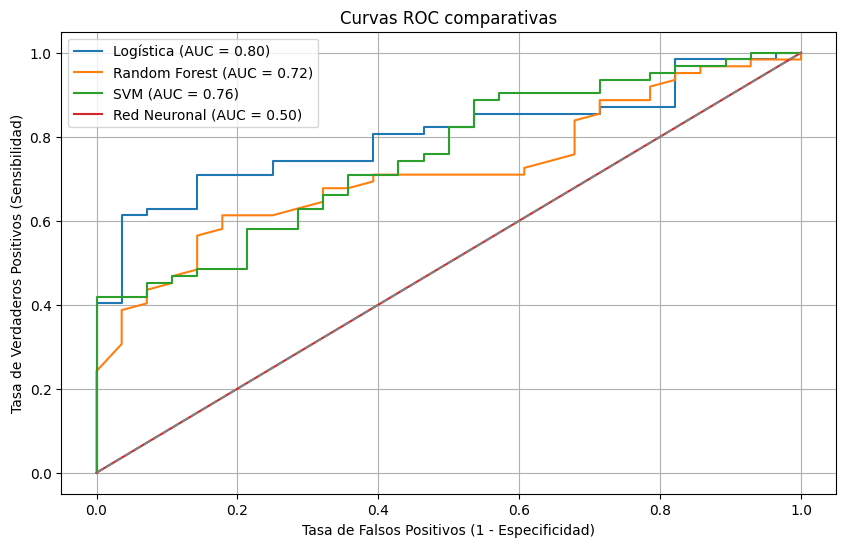

In [ ]:
#@title üìä Comparaci√≥n de modelos con Bootstrap y boxplots
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
import seaborn as sns


for modelo in modelos.values():
    modelo.fit(X_train, y_train)

# Bootstrap sobre test set
n_bootstraps = 100
metricas_boot = []
np.random.seed(42)

for i in range(n_bootstraps):
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    X_bs = X_test.iloc[indices]
    y_bs = y_test.iloc[indices]
    for nombre, modelo in modelos.items():
        y_pred = modelo.predict(X_bs)
        y_proba = modelo.predict_proba(X_bs)[:, 1]
        metricas_boot.append({
            'Modelo': nombre,
            'AUC': roc_auc_score(y_bs, y_proba),
            'Accuracy': accuracy_score(y_bs, y_pred),
            'Recall': recall_score(y_bs, y_pred),
            'Precision': precision_score(y_bs, y_pred)
        })

df_metricas = pd.DataFrame(metricas_boot)

# Gr√°fico boxplot de cada m√©trica
metricas_a_graficar = ['AUC', 'Accuracy', 'Recall', 'Precision']
for metrica in metricas_a_graficar:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_metricas, x='Modelo', y=metrica)
    plt.title(f"Distribuci√≥n de {metrica} (Bootstrap CI)")
    plt.grid(True)
    plt.show()

#@title üìà Curvas ROC comparativas
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
for nombre, modelo in modelos.items():
    y_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC comparativas')
plt.legend()
plt.grid(True)
plt.show()


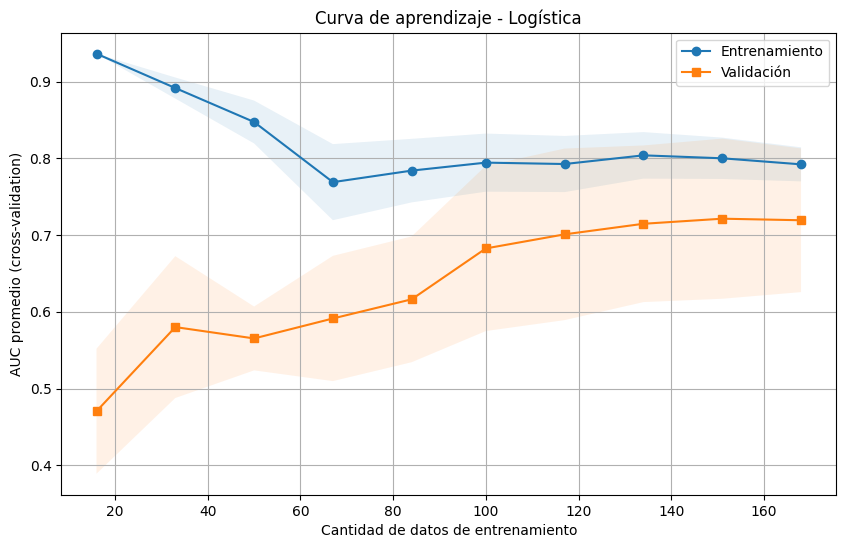

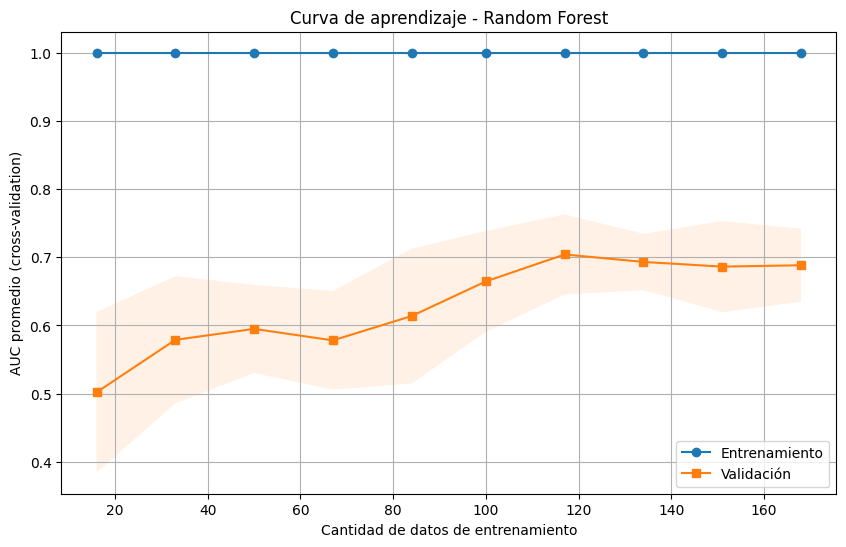

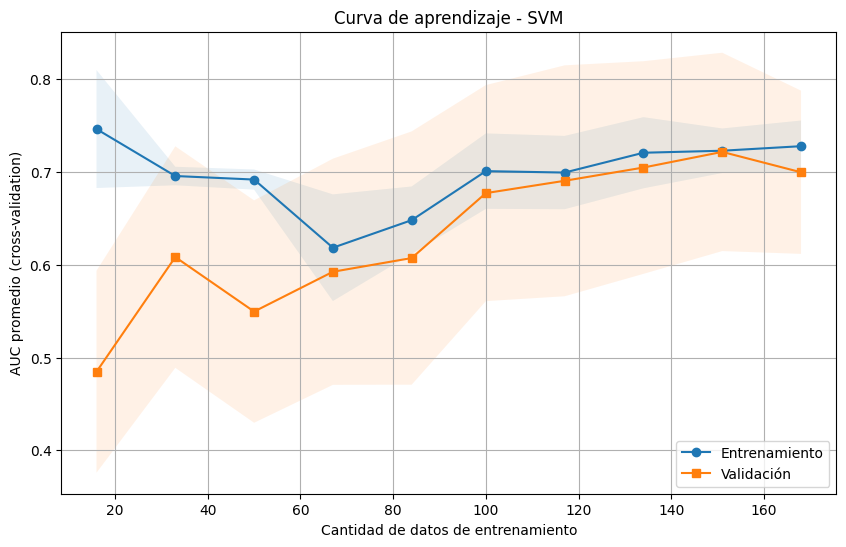

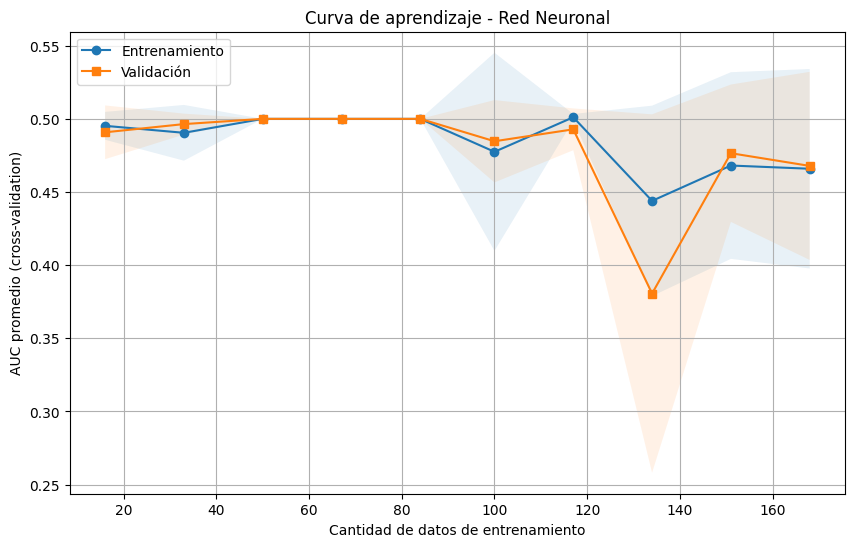

In [ ]:
#@title üìâ Curvas de underfitting vs overfitting por modelo
from sklearn.model_selection import learning_curve


train_sizes = np.linspace(0.1, 1.0, 10)

for nombre, modelo in modelos.items():
    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator=modelo,
        X=X_train,
        y=y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_std = val_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_mean, label='Entrenamiento', marker='o')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1)

    plt.plot(train_sizes_abs, val_mean, label='Validaci√≥n', marker='s')
    plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1)

    plt.title(f'Curva de aprendizaje - {nombre}')
    plt.xlabel('Cantidad de datos de entrenamiento')
    plt.ylabel('AUC promedio (cross-validation)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Optimizaci√≥n del modelo

In [ ]:
#@title üìà Optimizaci√≥n de hiperpar√°metros y comparaci√≥n de modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Codificar y dividir datos
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)
X_full = encoded_data.drop(columns=['diagnostico_neumonia', 'ingreso_uci', 'intubacion', 'mortalidad'], errors='ignore')
y_full = encoded_data['diagnostico_neumonia']

# Train, validation, test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Modelos base (sin ajustar)
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Optimizaci√≥n de hiperpar√°metros
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5, 10]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

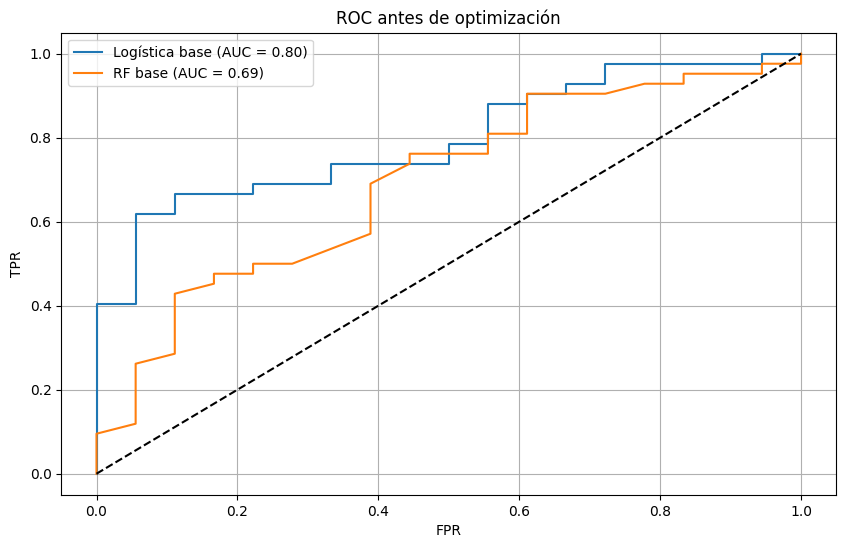

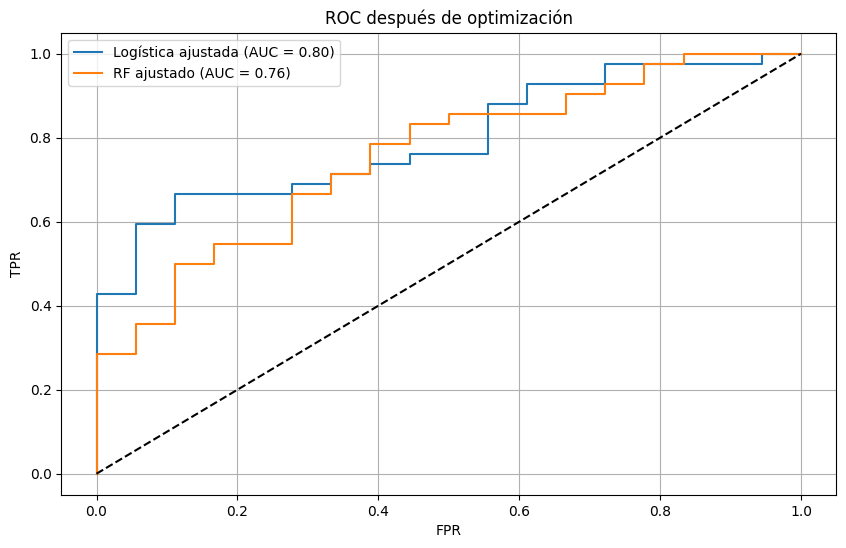

In [ ]:

# Evaluaci√≥n en test set
def plot_roc_comparison(modelos, X, y, title):
    plt.figure(figsize=(10, 6))
    for nombre, modelo in modelos.items():
        proba = modelo.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Comparaci√≥n pre y post optimizaci√≥n
modelos_pre = {'Log√≠stica base': model_lr, 'RF base': model_rf}
modelos_post = {'Log√≠stica ajustada': best_lr, 'RF ajustado': best_rf}

plot_roc_comparison(modelos_pre, X_test, y_test, 'ROC antes de optimizaci√≥n')
plot_roc_comparison(modelos_post, X_test, y_test, 'ROC despu√©s de optimizaci√≥n')



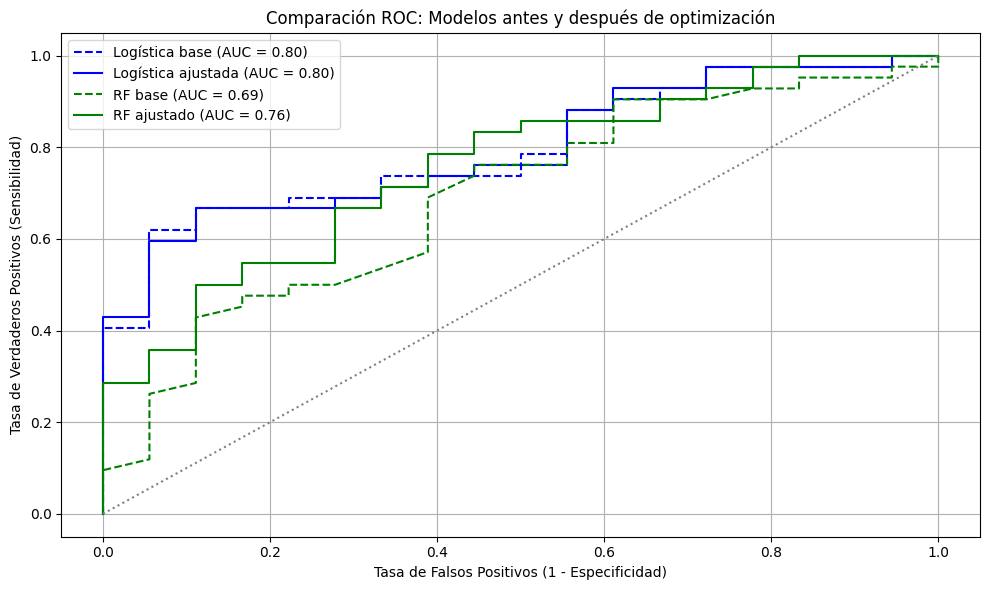

In [ ]:
#@title üìà Comparaci√≥n ROC: modelos base vs ajustados
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# ROC para Log√≠stica base y ajustada
for modelo, estilo in zip(['Log√≠stica base', 'Log√≠stica ajustada'], ['--', '-']):
    modelo_actual = modelos_pre[modelo] if 'base' in modelo else modelos_post[modelo]
    proba = modelo_actual.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle=estilo, color='blue', label=f"{modelo} (AUC = {roc_auc:.2f})")

# ROC para Random Forest base y ajustado
for modelo, estilo in zip(['RF base', 'RF ajustado'], ['--', '-']):
    modelo_actual = modelos_pre[modelo] if 'base' in modelo else modelos_post[modelo]
    proba = modelo_actual.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle=estilo, color='green', label=f"{modelo} (AUC = {roc_auc:.2f})")

# Diagonal de referencia
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')

# Personalizaci√≥n
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Comparaci√≥n ROC: Modelos antes y despu√©s de optimizaci√≥n')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Selecci√≥n de variables

Top 5 variables m√°s importantes: ['leucocitosis', 'pcr', 'edad', 'broncograma_aereo', 'foco_condensacion']


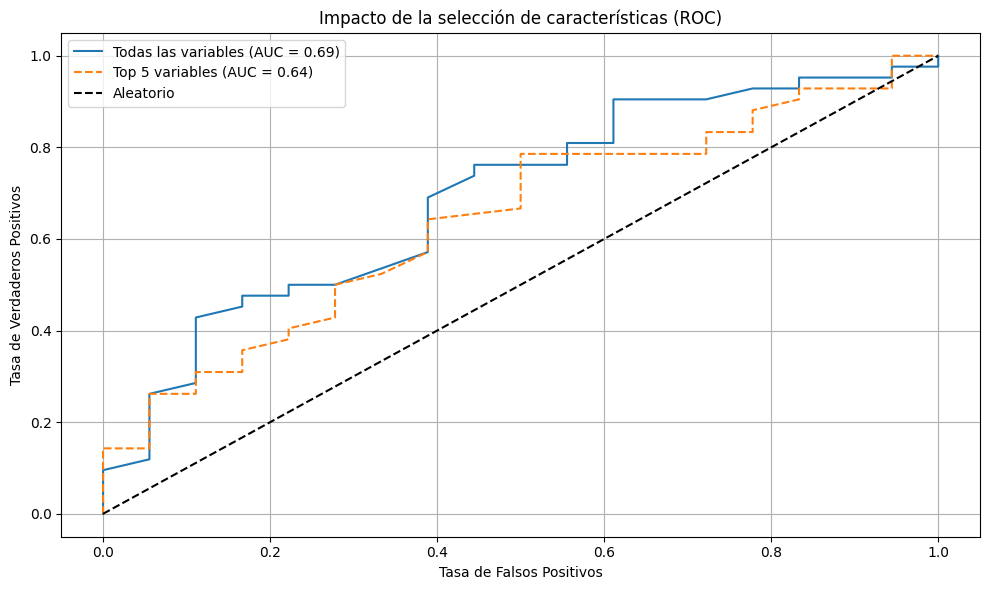

In [ ]:
#@title üìä Comparaci√≥n: modelo con todas las variables vs selecci√≥n de caracter√≠sticas
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento con todas las variables
modelo_completo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_completo.fit(X_train, y_train)
y_proba_completo = modelo_completo.predict_proba(X_test)[:, 1]
auc_completo = roc_auc_score(y_test, y_proba_completo)

# Obtener las 5 variables m√°s importantes
importances = modelo_completo.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:5]]
print("Top 5 variables m√°s importantes:", list(top_features))

# Entrenamiento solo con las top 5
modelo_reducido = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_reducido.fit(X_train[top_features], y_train)
y_proba_reducido = modelo_reducido.predict_proba(X_test[top_features])[:, 1]
auc_reducido = roc_auc_score(y_test, y_proba_reducido)

# Gr√°fico comparativo ROC
fpr_full, tpr_full, _ = roc_curve(y_test, y_proba_completo)
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, y_proba_reducido)

plt.figure(figsize=(10, 6))
plt.plot(fpr_full, tpr_full, label=f"Todas las variables (AUC = {auc_completo:.2f})", linestyle='-')
plt.plot(fpr_reduced, tpr_reduced, label=f"Top 5 variables (AUC = {auc_reducido:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Impacto de la selecci√≥n de caracter√≠sticas (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#‚úÖ Conclusi√≥n

Hemos construido un modelo de aprendizaje supervisado que permite predecir el diagn√≥stico de neumon√≠a
basado en variables cl√≠nicas e imagenol√≥gicas simples.

üìå Este ejemplo simplificado permite entender c√≥mo funcionan los modelos sin necesidad de conocimientos avanzados.
üë©‚Äç‚öïÔ∏è En la pr√°ctica cl√≠nica, se usar√≠an im√°genes reales, redes neuronales y validaci√≥n m√°s robusta.


# Discusi√≥n

¬øC√≥mo puede un modelo de ML supervisado mejorar el trabajo del radi√≥logo?

# Bibliograf√≠a